In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [19]:
df=pd.read_excel('http://taanila.fi/CO2.xlsx')
df.index = pd.to_datetime(df['Kuukausi'],format="%Y-%m")
df=df.drop('Kuukausi',axis=1)
df.tail()

,CO2
Kuukausi,
2018-09-01,405.51
2018-10-01,406.00
2018-11-01,408.02
2018-12-01,409.07
2019-01-01,410.81


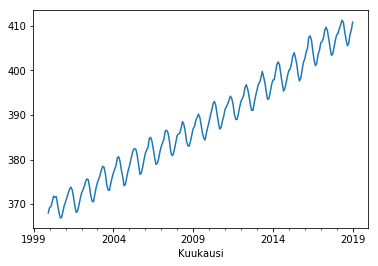

In [14]:
df['CO2'].plot()

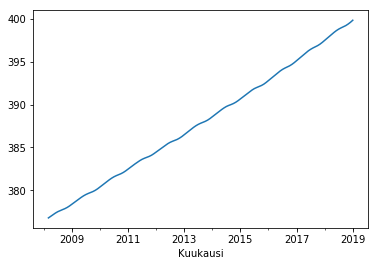

In [13]:
#Rolling average ilmaston CO2-pitoisuudesta
df['CO2'].rolling(100).mean().plot()

In [65]:
#Sovitetaan kurssikehitys Yksinkertaisen eksponentiaalisen malliin
fit1 = SimpleExpSmoothing(df['CO2']).fit()

C:\Users\joniv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


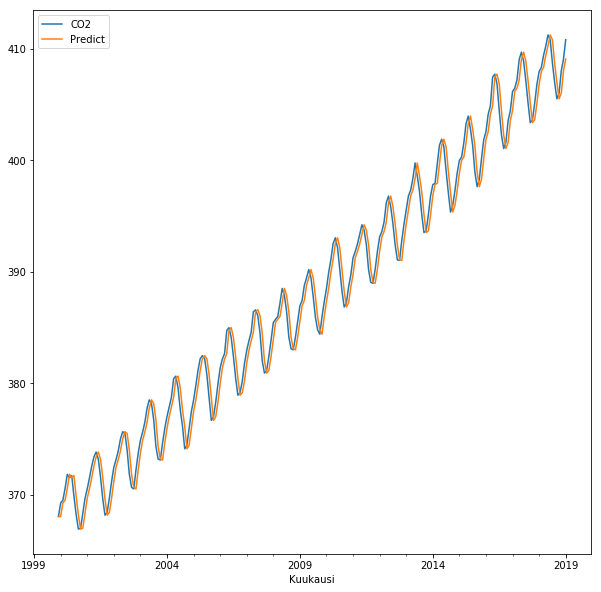

In [12]:
data = pd.DataFrame(df['CO2'], index=df.index)
data['Predict']=fit1.fittedvalues

data.plot(figsize=(10,10))

In [15]:
#Arvioidaan mallin hyvyyttä
sqrt(mean_squared_error(data['CO2'], data['Predict']))

1.2984671565048285

In [16]:
mean_absolute_error(data['CO2'], data['Predict'])

1.157695652173912

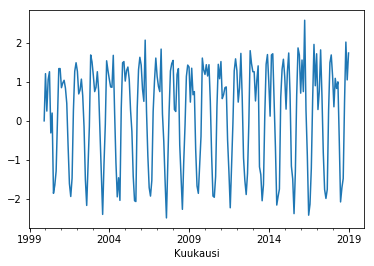

In [17]:
data['Residual']=fit1.resid
data['Residual'].plot()

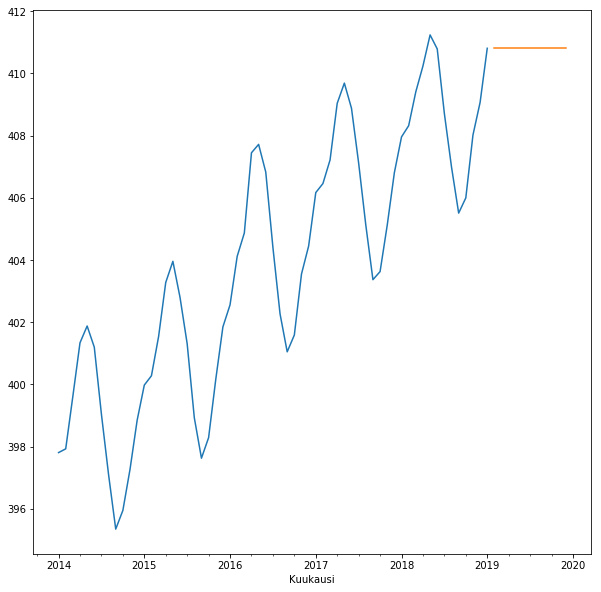

In [93]:
#Lasketaan mallin ennusteet
index=pd.date_range(start='2019-02-01', end='2020-01-01', freq='MS')
ennuste=pd.DataFrame(fit1.forecast(11), index=index)
ennuste.columns=['Predict']

data['CO2']['2014-1-1':].plot()
ennuste['Predict'].plot(figsize=(10,10))

Kuten nähdään edellinen malli ei anna kovinkaan hyvää ennustetta, joten kokeillaan seuraavaksi kaksinkertaista eksponentiaalista tasoitusta.

In [64]:
fit2=Holt(df['CO2']).fit()

C:\Users\joniv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


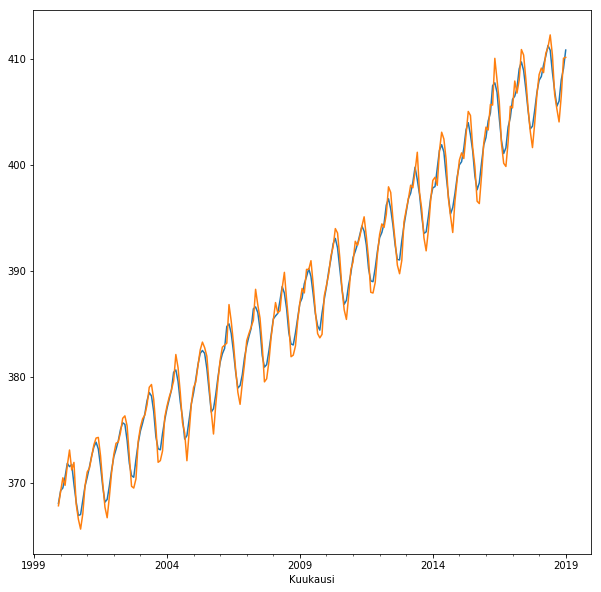

In [68]:
#Käytetään olemassa olevaa dataframe ja lisätään siihen uusi sarake johon sijoitetaan Holtin mallin simuloidut arvo
data['PredictH']=fit2.fittedvalues

data['CO2'].plot()
data['PredictH'].plot(figsize=(10,10))

In [72]:
#Arvioidaan mallin hyvyyttä
sqrt(mean_squared_error(data['CO2'], data['PredictH']))

0.9961672764407729

In [73]:
mean_absolute_error(data['CO2'], data['PredictH'])

0.8105045282789362

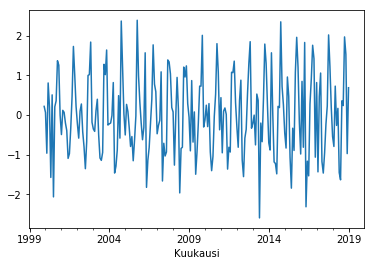

In [75]:
data['ResidualH']=fit2.resid
data['ResidualH'].plot()

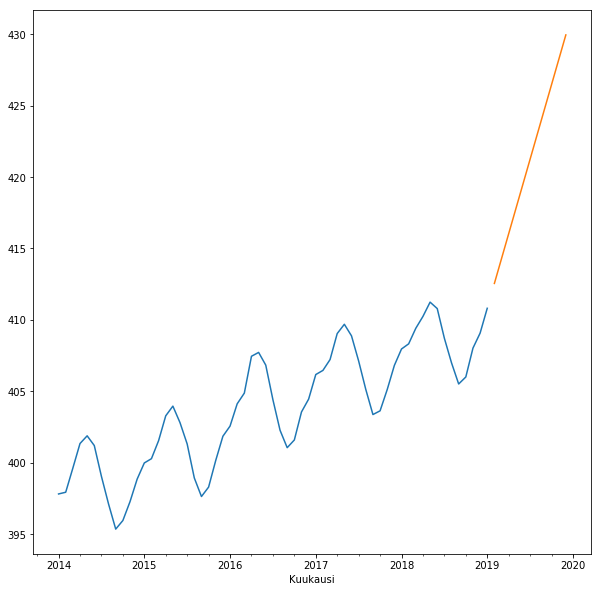

In [95]:
#Lasketaan ennusteet Holtin mallilla
index=pd.date_range(start='2019-02-01', end='2020-01-01', freq='MS')
ennuste=pd.DataFrame(fit2.forecast(11), index=index)
ennuste.columns=['PredictH']

data['CO2']['2014-01-01':].plot()
ennuste['PredictH'].plot(figsize=(10,10))


Myöskään Holtin mallin ennuste ei anna kovinkaan hyvää ennustetta, joten kokeillaan vielä kolminkertaisen eksponentiaalisen tasoituksen mallia (Holt-Winter)

In [96]:
fit3=ExponentialSmoothing(df['CO2'], seasonal_periods=12, trend='add', seasonal='mul').fit()

C:\Users\joniv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


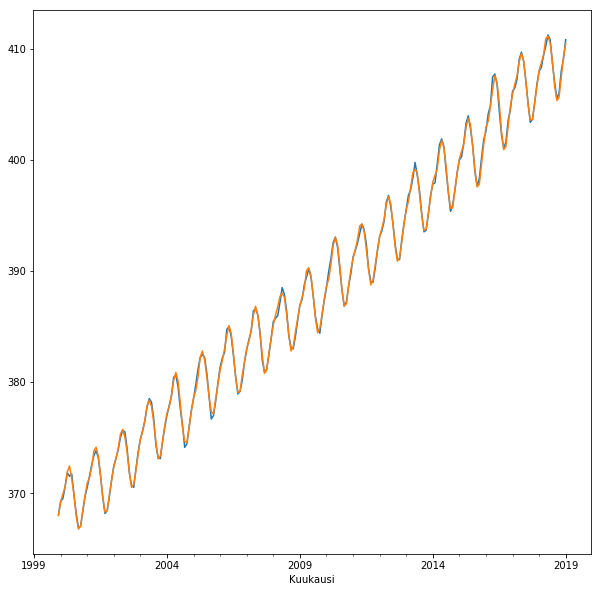

In [97]:
data['PredictHW']=fit3.fittedvalues

data['CO2'].plot()
data['PredictHW'].plot(figsize=(10,10))

In [98]:
#Arvioidaan mallin hyvyyttä
sqrt(mean_squared_error(data['CO2'], data['PredictHW']))

0.3050544305885476

In [99]:
mean_absolute_error(data['CO2'], data['PredictHW'])

0.23645672523589853

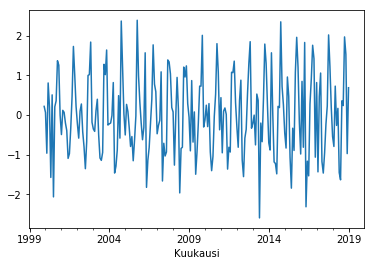

In [100]:
data['ResidualHW']=fit2.resid
data['ResidualHW'].plot()

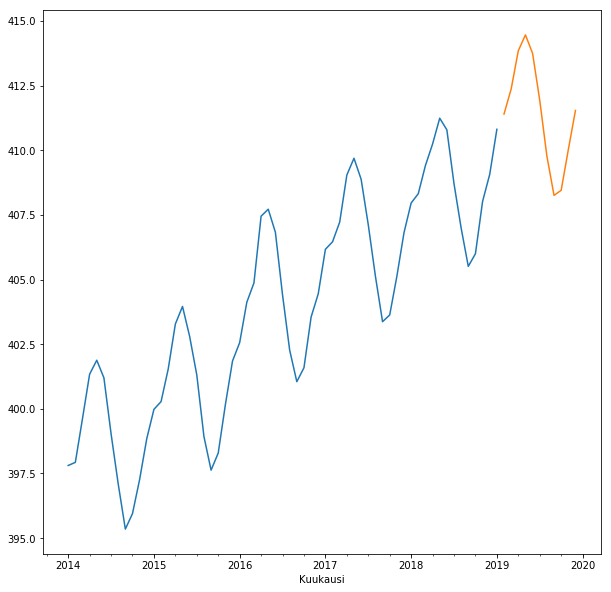

In [102]:
#Lasketaan ennusteet Holtin mallilla
index=pd.date_range(start='2019-02-01', end='2020-01-01', freq='MS')
ennuste=pd.DataFrame(fit3.forecast(11), index=index)
ennuste.columns=['PredictHW']

data['CO2']['2014-01-01':].plot()
ennuste['PredictHW'].plot(figsize=(10,10))

Kuten nähdään, niin selkeästi paras malli tämän aikasarjan ennustamiselle on kolminkertaisen eksponentiaalisen tasoituksen eli Holt-Winterin malli.